In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-09 06:31:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.79MB/s    in 47s     

2020-06-09 06:31:57 (6.50 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Ekstraksi file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
referensi_zip = zipfile.ZipFile(local_zip, 'r')
referensi_zip.extractall('/tmp')
referensi_zip.close()

dir_base = '/tmp/rockpaperscissors/rps-cv-images'
dir_training = os.path.join(dir_base, 'training')
dir_validation = os.path.join(dir_base, 'validation')

In [ ]:
#augmentasi gambar
datagen = ImageDataGenerator(validation_split=0.3,
                             rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             shear_range = 0.2,
                             fill_mode = 'nearest')

In [ ]:
training_generator = datagen.flow_from_directory(dir_base,
                                                 target_size=(200,200),
                                                 batch_size=4,
                                                 subset='training', 
                                                 class_mode='categorical')

validation_generator = datagen.flow_from_directory(dir_base,
                                                   target_size=(200,200), 
                                                   batch_size=4,
                                                   subset='validation', 
                                                   class_mode='categorical')

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'), # Hidden Layer
                                    tf.keras.layers.Dense(512, activation='relu'), # Hidden Layer
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adagrad(),
              metrics=['accuracy'])

In [ ]:
model.fit(training_generator,
          steps_per_epoch=15, # Berapa batch yang akan dieksekusi pada setiap epoch
          epochs=20,
          validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
          validation_steps=5, # Jumlah batch yang dieksekusi pada setiap epoch
          verbose=1)

Epoch 1/20
15/15 [==============================] - 7s 479ms/step - loss: 0.2247 - accuracy: 0.9167 - val_loss: 0.1046 - val_accuracy: 0.9500
Epoch 2/20
15/15 [==============================] - 7s 447ms/step - loss: 0.1344 - accuracy: 0.9649 - val_loss: 0.0551 - val_accuracy: 1.0000
Epoch 3/20
15/15 [==============================] - 7s 469ms/step - loss: 0.0708 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.8000
Epoch 4/20
15/15 [==============================] - 7s 490ms/step - loss: 0.1635 - accuracy: 0.9333 - val_loss: 0.0950 - val_accuracy: 1.0000
Epoch 5/20
15/15 [==============================] - 7s 464ms/step - loss: 0.2029 - accuracy: 0.8833 - val_loss: 0.1278 - val_accuracy: 0.9500
Epoch 6/20
15/15 [==============================] - 7s 461ms/step - loss: 0.1237 - accuracy: 0.9500 - val_loss: 0.0315 - val_accuracy: 1.0000
Epoch 7/20
15/15 [==============================] - 7s 462ms/step - loss: 0.0836 - accuracy: 0.9833 - val_loss: 0.1892 - val_accuracy: 0.9500
Epoch 

Saving 1Frbe8cdOdkciOBg.png to 1Frbe8cdOdkciOBg (1).png
1Frbe8cdOdkciOBg.png
paper
0


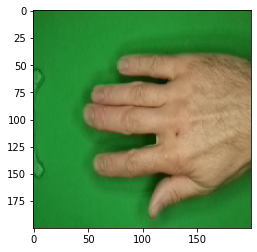

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(200,200))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  hasil = np.argmax(classes)

  print(fn)
  if hasil==0:
    print("paper")
  elif hasil==1:
    print("rock")
  elif hasil==2:
    print("scissors")

  print(hasil)  
    